Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [82]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")['Count']
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")['Count']
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")['Count']
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")["Deg"]
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")["Close"]
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")['Count']

In [56]:
#1\6 sales_of_company_x - проверяем ряд на стационарнойть. p-value огромный - ряд не тсационарный. Виден тренд и сезонность

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


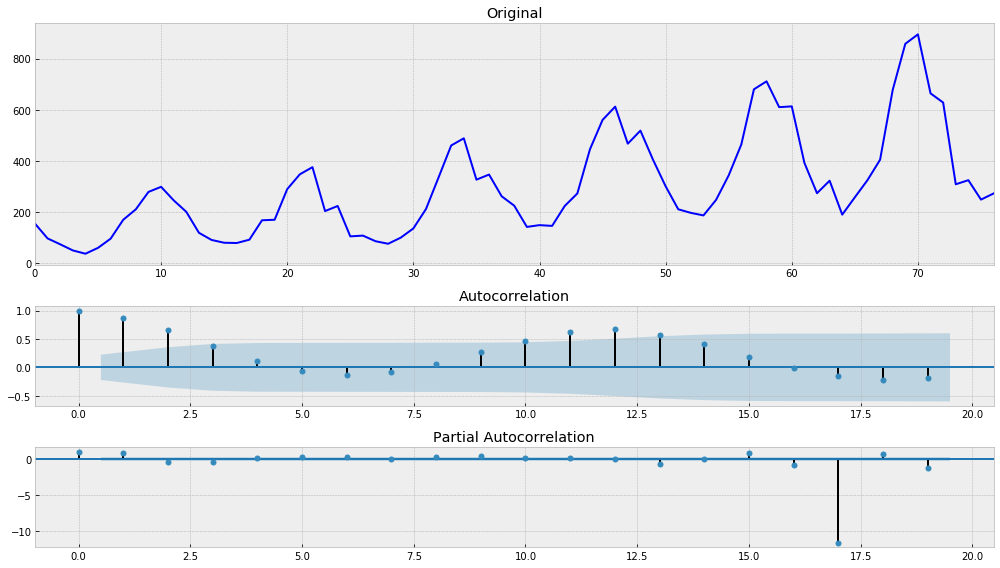

In [57]:
tsplot(sales_of_company_x)

In [58]:
#уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [59]:
sales_of_company_x = boxcox(sales_of_company_x, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


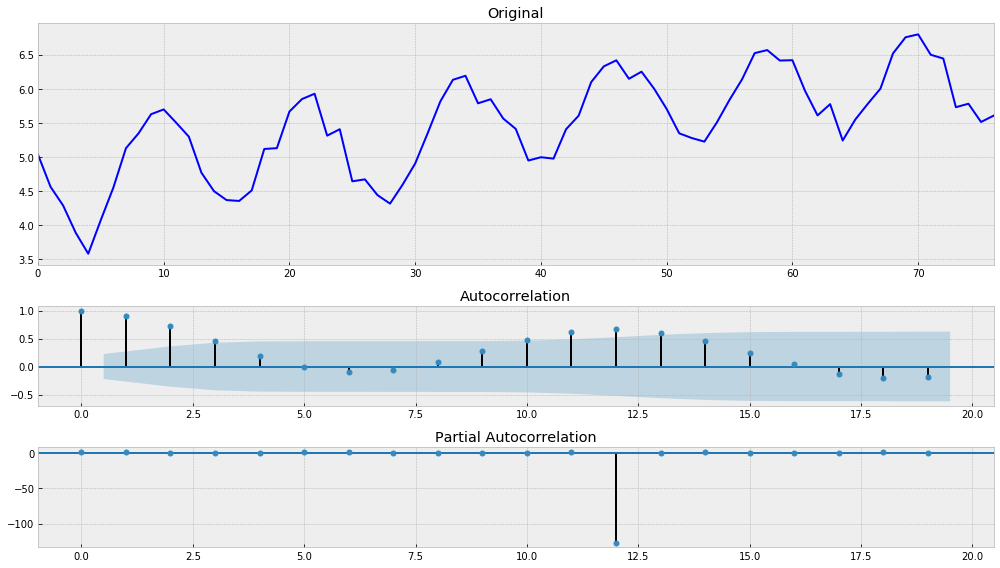

In [60]:
tsplot(sales_of_company_x)

In [61]:
#Стало лучше, но ряд все равно не стационарный - есть тренд и сезонность


Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


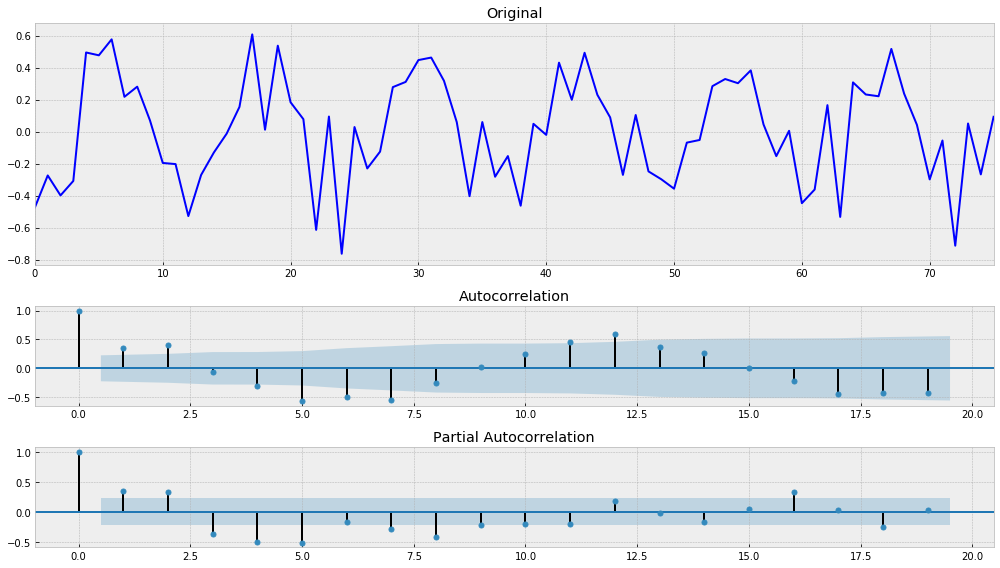

In [62]:
sales_of_company_x = sales_of_company_x[1:] - sales_of_company_x[:-1]
tsplot(sales_of_company_x)

In [21]:
#Убраи тренд. p-val 2% - как бы можно признать ряд стационарным, но явно видно по автокоррекляции сезонность - уерем ее

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


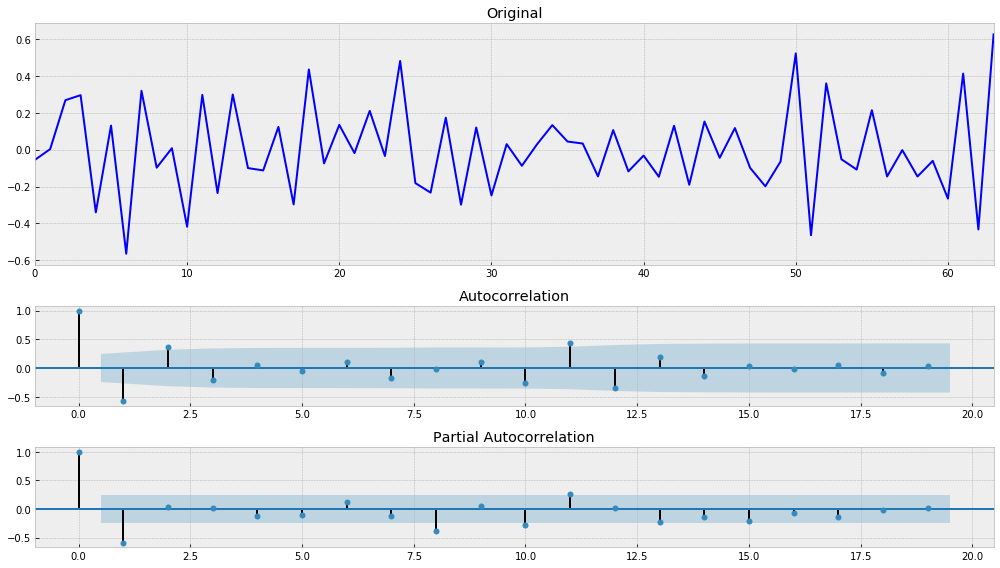

In [63]:
sales_of_company_x = sales_of_company_x[12:] - sales_of_company_x[:-12]
tsplot(sales_of_company_x)

In [64]:
#сезонность 12 не могла. Но мы еще раз прогоним снятие сезонности но со смещением в 10

Results of Dickey-Fuller Test:
Test Statistic                 -3.848888
p-value                         0.002445
#Lags Used                      9.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


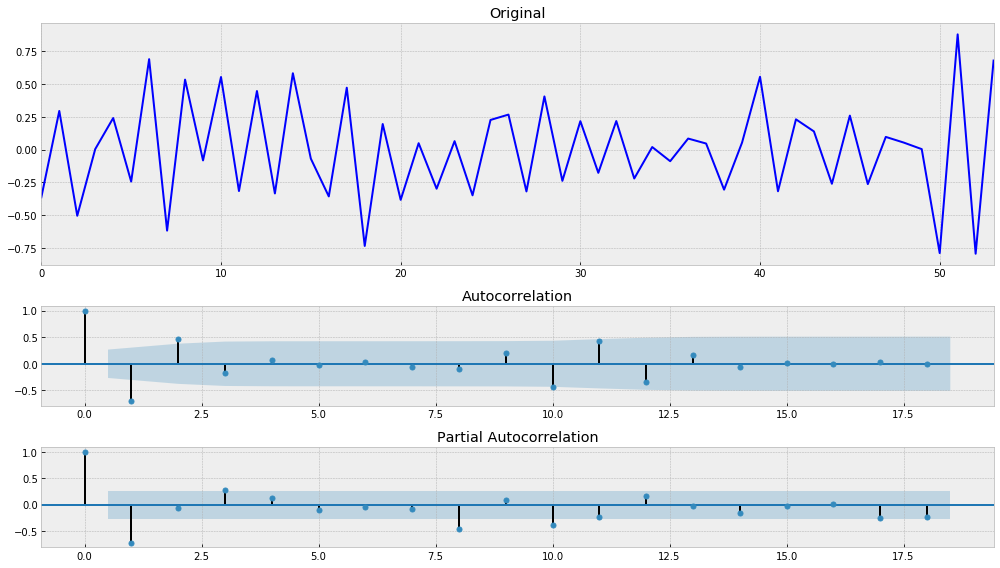

In [65]:
sales_of_company_x = sales_of_company_x[10:] - sales_of_company_x[:-10]
tsplot(sales_of_company_x)

In [66]:
#p-val стал 0,2% - ряд стационарный - важно те чистели сезонность 2 раза!

In [67]:
#2\6 robberies_in_boston 

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


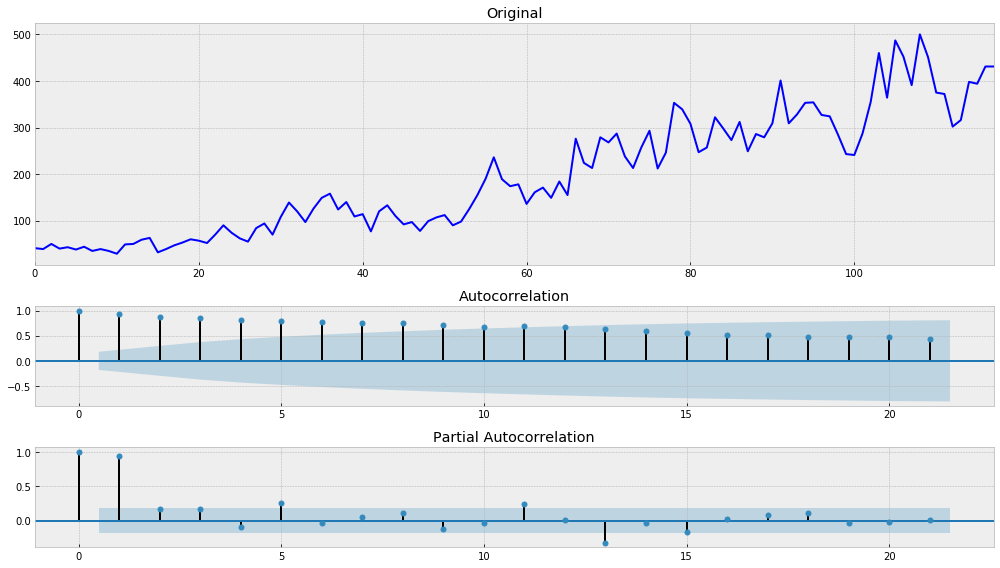

In [68]:
tsplot(robberies_in_boston)

In [69]:
#Ряд не стационарный виден очень большой тренд. Сезонность сомпнительная. Сделаем преобразование Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


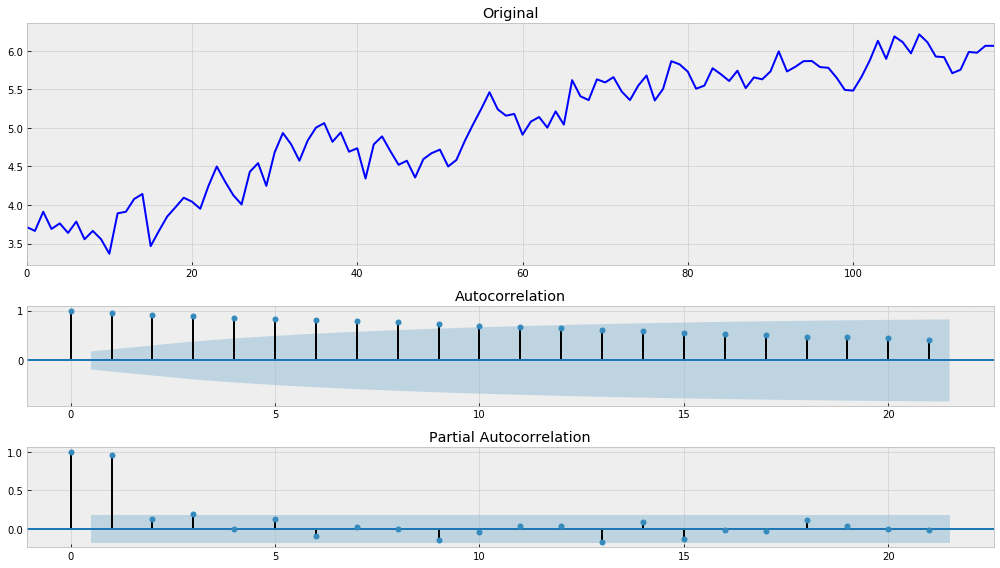

In [70]:
robberies_in_boston = boxcox(robberies_in_boston,0)
tsplot(robberies_in_boston)

In [71]:
#Стало лучше но ряд по прежнему не стационарен - польшое p-val. Уберем деференсацию

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


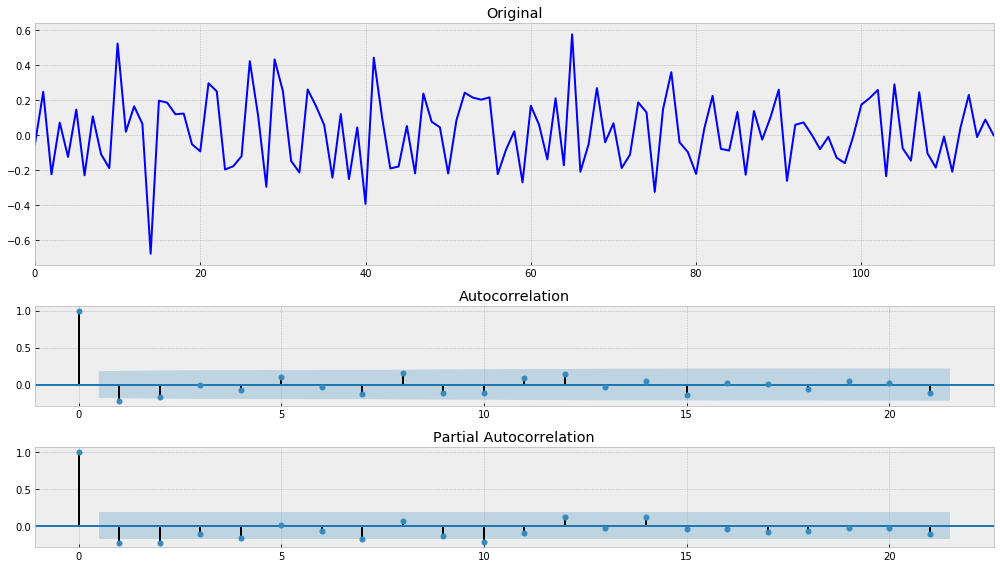

In [72]:
robberies_in_boston = robberies_in_boston[1:] - robberies_in_boston[:-1]
tsplot(robberies_in_boston)

In [73]:
#ряд стал стационарным - p-val страмится к нулю. сезонности не видно

In [74]:
#3\6 airlines_passengers

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


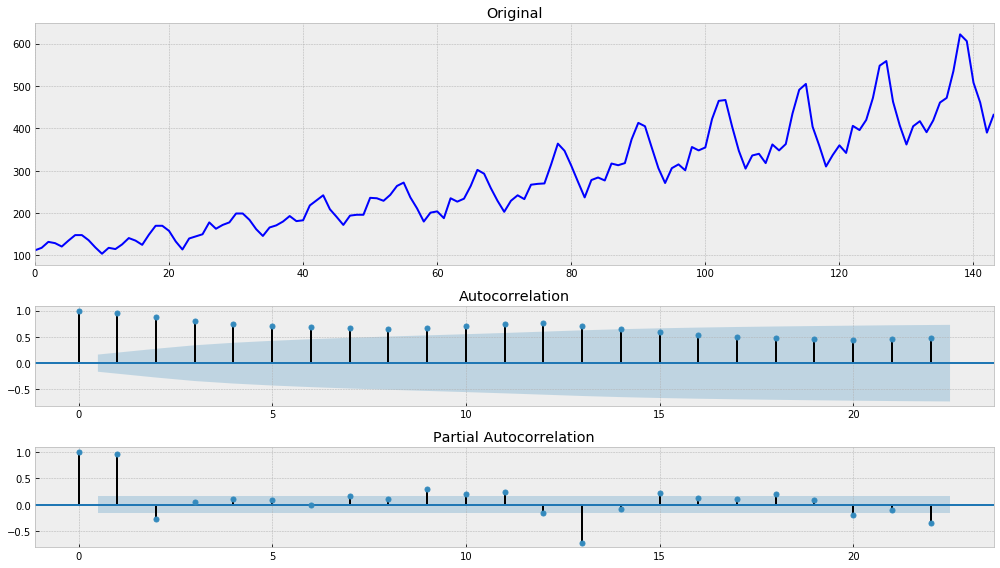

In [75]:
tsplot(airlines_passengers)

In [76]:
#ряд не стационарный. виден тренд и сезонность. сдесь сделаем все сразу - и преобразование Бокса-Кокса и очистим тренд и сезонность

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


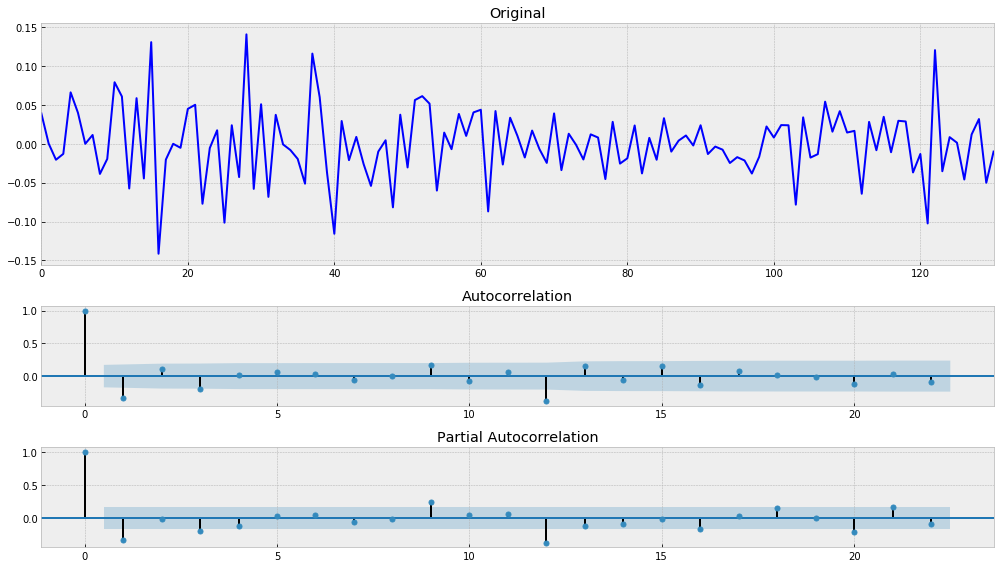

In [83]:
airlines_passengers = boxcox(airlines_passengers,0)
airlines_passengers = airlines_passengers[1:] - airlines_passengers[:-1]
airlines_passengers = airlines_passengers[12:] - airlines_passengers[:-12]
tsplot(airlines_passengers)

In [84]:
#ряд стал стационарным


In [85]:
#4\6

In [230]:
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")["Deg"]

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


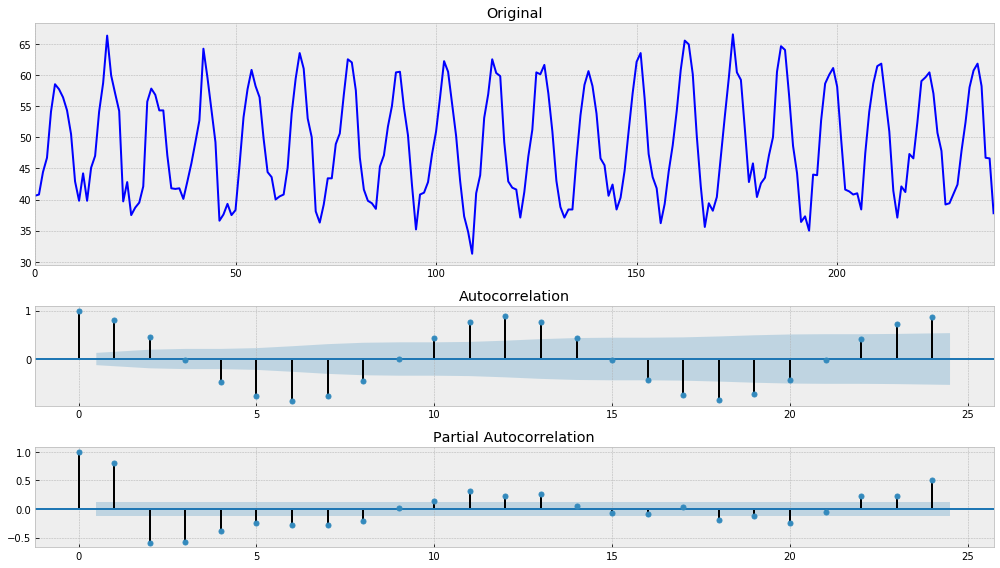

In [231]:
tsplot(mean_monthly_temp)

In [232]:
#тест говорит что ряд стационарный - p-val 1,6% Но видна ярковыраженная сезонность. тренда нет. С делаем преобразование бокса-кокса


Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


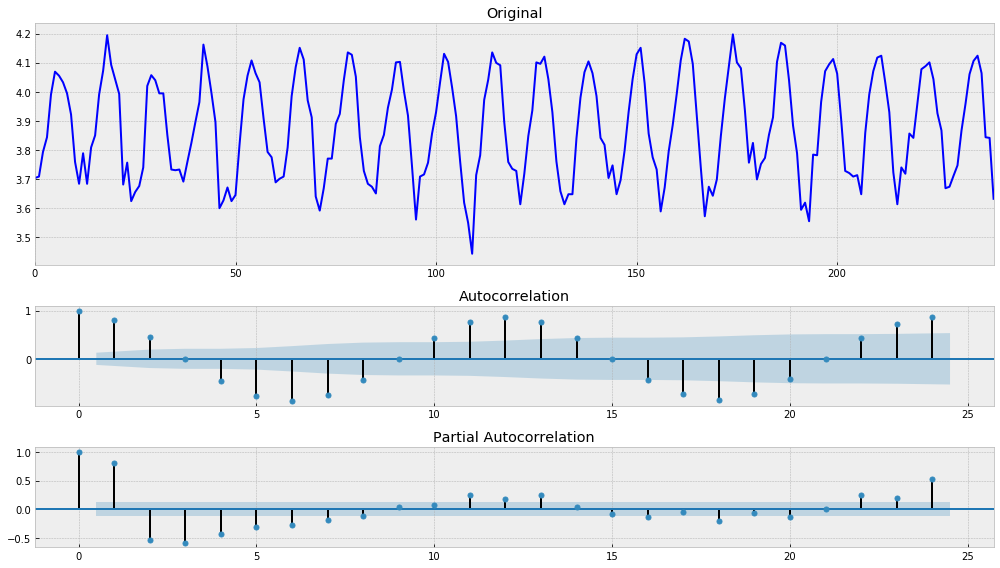

In [233]:
mean_monthly_temp = boxcox(mean_monthly_temp,0)
tsplot(mean_monthly_temp)

In [234]:
#ряд еще стал более стационарным

Results of Dickey-Fuller Test:
Test Statistic                -1.214226e+01
p-value                        1.640728e-22
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


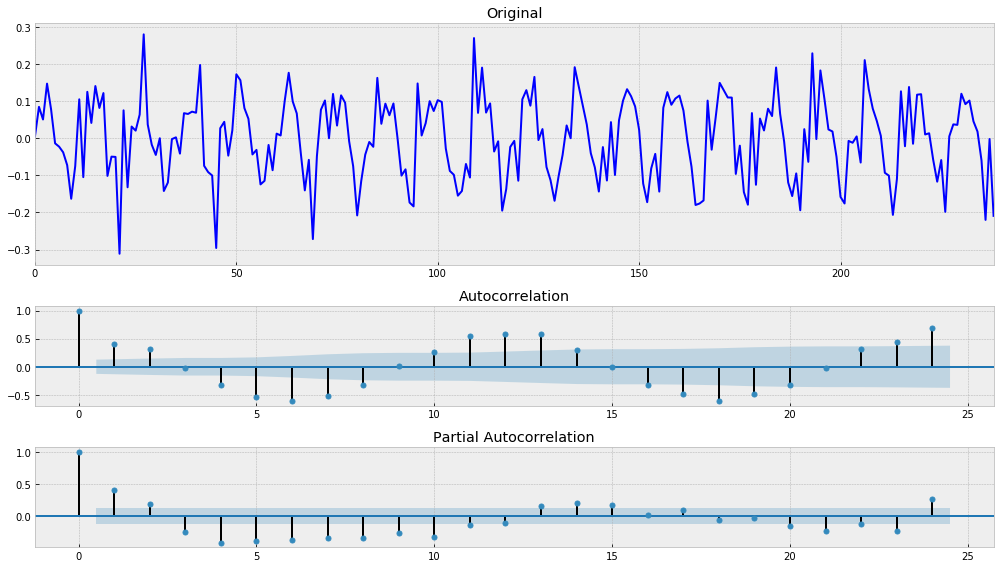

In [235]:
mean_monthly_temp = mean_monthly_temp[1:] - mean_monthly_temp[:-1]
tsplot(mean_monthly_temp)

In [236]:
#вообще можно сказать стационарыный - но видна сезонность примерно в 24 проверим что будет


Results of Dickey-Fuller Test:
Test Statistic                -5.816140e+00
p-value                        4.288099e-07
#Lags Used                     1.500000e+01
Number of Observations Used    1.990000e+02
Critical Value (1%)           -3.463645e+00
Critical Value (5%)           -2.876176e+00
Critical Value (10%)          -2.574572e+00
dtype: float64


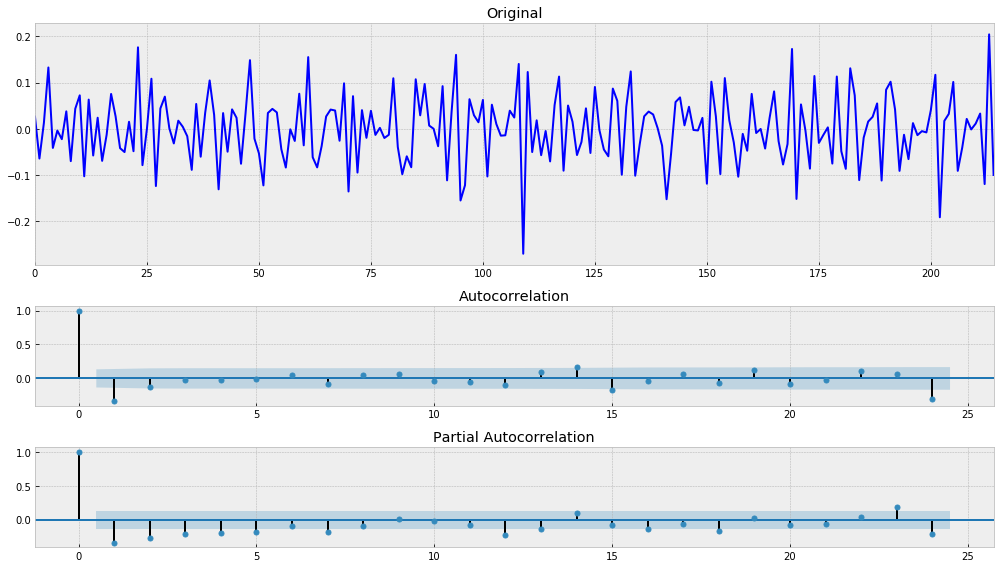

In [237]:
mean_monthly_temp = mean_monthly_temp[24:] - mean_monthly_temp[:-24]
tsplot(mean_monthly_temp)

In [238]:
#ну вообще полностью стационарен =)

In [239]:
#5\6 dowjones_closing

In [240]:
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")["Close"]

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


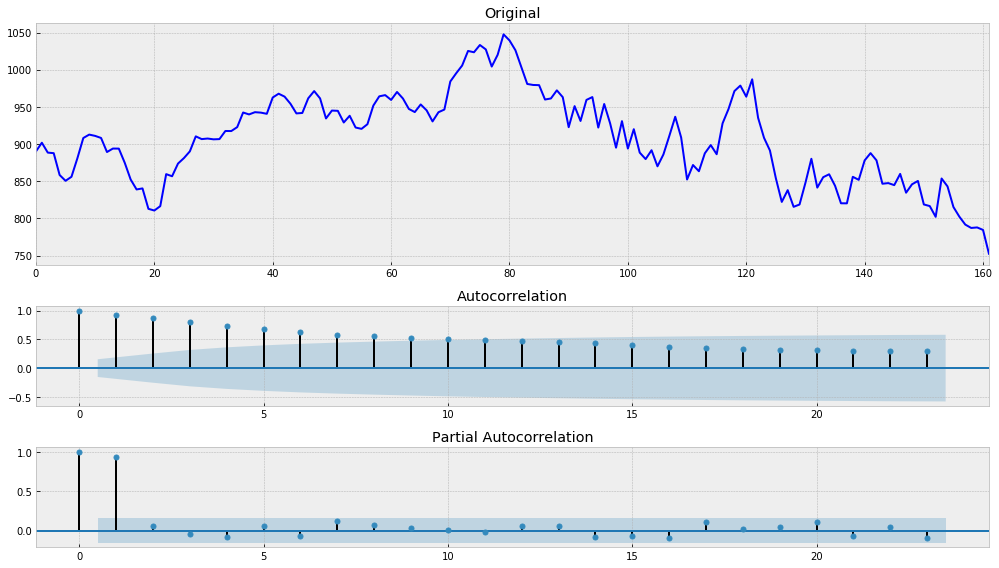

In [241]:
tsplot(dowjones_closing)

In [242]:
#не стационарный. вижен тренд

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


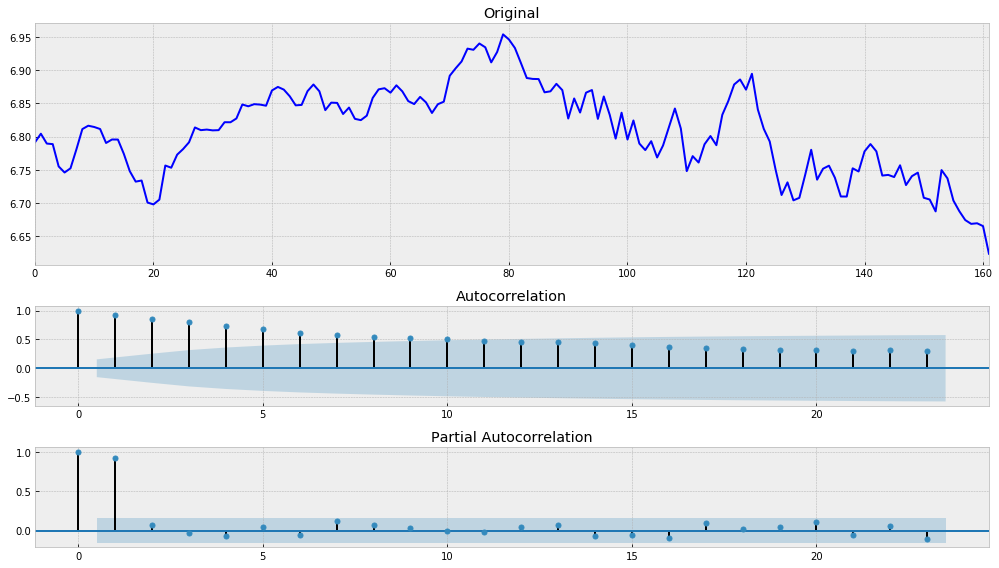

In [243]:
dowjones_closing = boxcox(dowjones_closing, 0)
tsplot(dowjones_closing)

In [244]:
#преобразование бокса-кокса не помогло - даже сделало P-val хуже

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


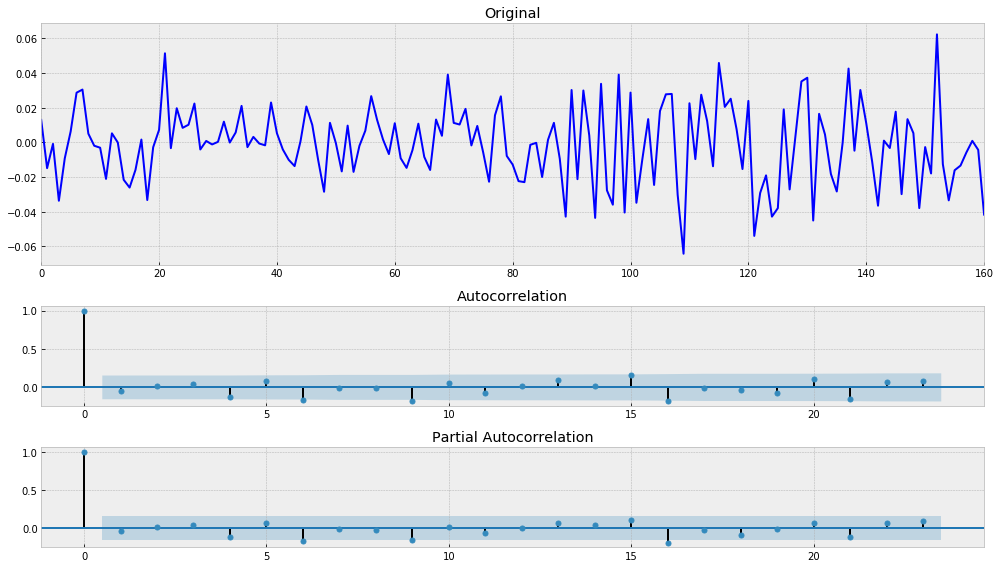

In [245]:
dowjones_closing = dowjones_closing[1:] - dowjones_closing[:-1]
tsplot(dowjones_closing)

In [246]:
#убрал тренд и ряд стал полностью стационарным

In [248]:
#6\6 female_births

In [249]:
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


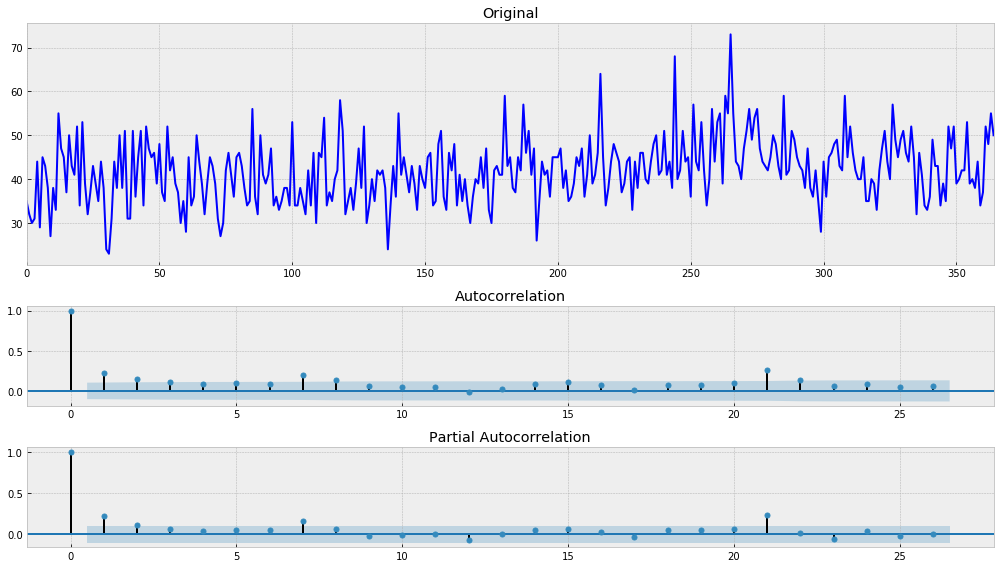

In [250]:
tsplot(female_births)

In [251]:
#ряд полностью стационарен - не чего не нужно мудрить